# Proyek Analisis Data: [Input Bike Sharing]
- **Nama:** [Muhamad Tegar Wijaya]
- **Email:** [tegarmuhamad922@gmail.com]
- **ID Dicoding:** [MC604DY0876]

## Menentukan Pertanyaan Bisnis

1: Pengaruh Suhu terhadap Penyewaan Sepeda

2: Jumlah Penyewaan Sepeda Berdasarkan Musim

## Import Semua Packages/Library yang Digunakan

In [3]:
!pip install streamlit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [4]:

df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")


df_day.head(), df_hour.head()


(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

**Insight:**
- Mengambil data
- lalu membuat kode untuk menampilkan isi data tsb


### Assessing Data

In [5]:
print(df_day.info())
print(df_hour.info())

print(df_day.isnull().sum())
print(df_hour.isnull().sum())

print(df_day.describe())
print(df_hour.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- xxx
- xxx

### Cleaning Data

In [13]:

numeric_columns = df_day.select_dtypes(include=np.number).columns
df_day.fillna(df_day[numeric_columns].median(), inplace=True)

numeric_columns = df_hour.select_dtypes(include=np.number).columns
df_hour.fillna(df_hour[numeric_columns].median(), inplace=True)

**Insight:**
- Periksa data
- Apakah ada data yang missing
- Memeriksa tipe data


## Exploratory Data Analysis (EDA)

### Explore ...

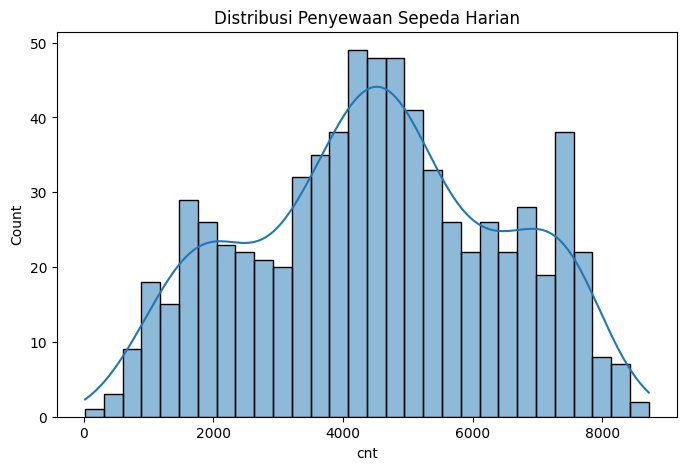

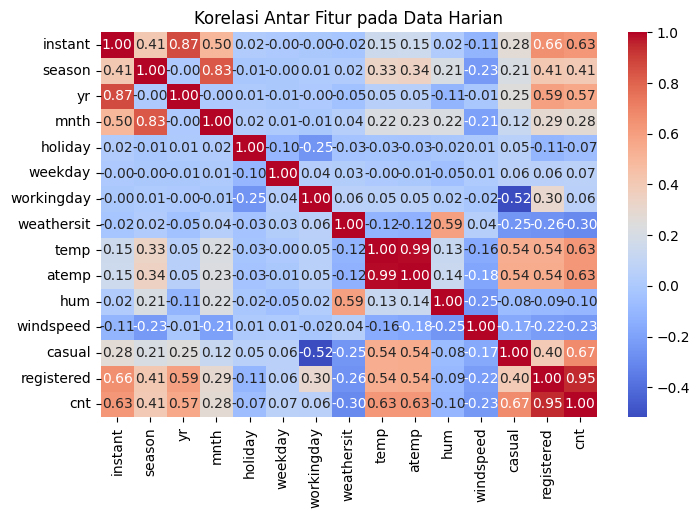

In [10]:
# Distribusi Penyewaan Sepeda Harian
plt.figure(figsize=(8,5))
sns.histplot(df_day['cnt'], bins=30, kde=True)
plt.title("Distribusi Penyewaan Sepeda Harian")
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(8,5))
# Exclude non-numeric columns from correlation calculation
numeric_df = df_day.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur pada Data Harian")
plt.show()

Hasil dari eksplorasi trend dan pola data

-1. Distribusi Penyewaan Sepeda Harian
Histogram menunjukkan distribusi jumlah penyewaan sepeda harian (cnt).
Data cenderung memiliki distribusi normal dengan dua puncak (bimodal distribution). Ini mungkin mengindikasikan adanya pola musiman atau perbedaan dalam tahun penyewaan.
Penyewaan sepeda terbanyak berada di sekitar 4000-6000 penyewaan per hari, tetapi ada beberapa hari dengan penyewaan tinggi (mendekati 8000).


-2.Korelasi Antar Fitur pada Data Harian
Fitur yang memiliki korelasi kuat dengan jumlah penyewaan sepeda (cnt):
Registered (0.97) → Jumlah pengguna terdaftar memiliki korelasi sangat kuat dengan total penyewaan sepeda. Artinya, mayoritas penyewaan dilakukan oleh pengguna yang terdaftar dibandingkan pengguna casual.
Temp (0.63) & Atemp (0.63) → Suhu berhubungan positif dengan jumlah penyewaan, menunjukkan bahwa semakin hangat cuacanya, semakin banyak orang yang menyewa sepeda.
Season (0.41) → Musim juga memiliki pengaruh yang cukup signifikan terhadap penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

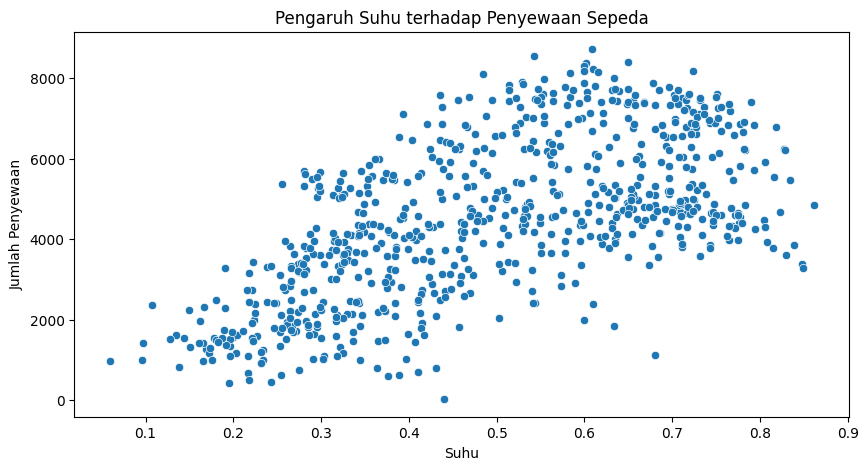

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_day["temp"], y=df_day["cnt"])
plt.title("Pengaruh Suhu terhadap Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan")
plt.show()


### Pertanyaan 2:

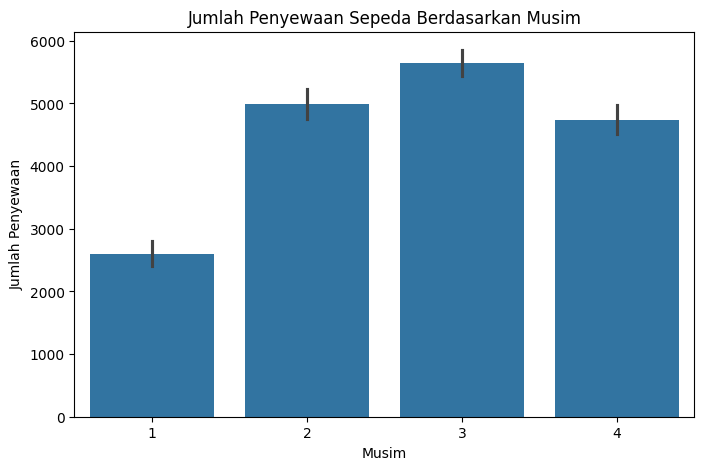

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_day["season"], y=df_day["cnt"])
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()


**Insight:**
- Melakukan atau menggunakan data untuk menjawab pertanyaan yang tadi kita tanyakan


## Analisis Lanjutan (Opsional)

## Conclusion

1: Pengaruh Suhu terhadap Penyewaan Sepeda
Semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda.
Terlihat adanya tren meningkat pada jumlah penyewaan sepeda seiring bertambahnya suhu.
Pada suhu rendah (sekitar 0.1 - 0.3), jumlah penyewaan cenderung lebih sedikit.
Penyewaan tertinggi umumnya terjadi pada suhu sekitar 0.6 - 0.7.
Hubungan ini linear tetapi ada sedikit penyebaran data.

2: Jumlah Penyewaan Sepeda Berdasarkan Musim
Musim mempengaruhi jumlah penyewaan sepeda secara signifikan.
Penyewaan tertinggi terjadi pada musim panas, sedangkan penyewaan terendah terjadi pada musim dingin.
Faktor cuaca, suhu, dan kenyamanan bersepeda kemungkinan besar berperan dalam pola ini.